In [301]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import math
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats

In [302]:
def xftn(x, y):
    return -y

def yftn(x, y):
    return x

In [3]:
step = 1 # 간격
xL, xR, yB, yT = -10, 10, -10, 10 # Field 의 크기
size = (int)((xR - xL)/step)+1


In [10]:
x, y, u, v = np.empty((size, size), float),np.empty((size, size), float),np.empty((size, size), float),np.empty((size, size), float)

for i in range(size):
    for j in range(size):
        x[i][j] = xL + step*i
        y[i][j] = yB + step*j
        u[i][j] = xftn(x[i][j], y[i][j])
        v[i][j] = yftn(x[i][j], y[i][j])

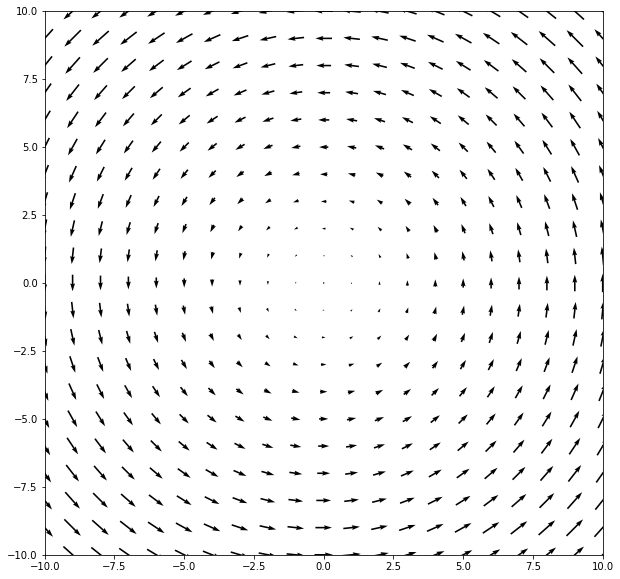

In [11]:
plt.figure(figsize=(10,10))
plt.quiver(x,y,u,v, pivot='middle')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

In [375]:
# 벡터장 함수

def draw_vector_field(xyftn, d_xftn, d_yftn, step, size):
    xL, xR, yB, yT = -1*size, size, -1*size, size
    SIZE = (int)((xR - xL)/step)+1
    x, y, u, v = np.empty((SIZE, SIZE), float),np.empty((SIZE, SIZE), float),np.empty((SIZE, SIZE), float),np.empty((SIZE, SIZE), float)

    for i in range(SIZE):
        for j in range(SIZE):
            x[i][j] = xL + step*i
            y[i][j] = yB + step*j
            dev = derivative(xyftn, np.array([x[i][j], y[i][j]]))
            u[i][j] = dev[0]
            v[i][j] = dev[1]
    plt.figure(figsize=(10,10))
    plt.quiver(x,y,u,v, pivot='middle')
    plt.xlim(-1*size,size)
    plt.ylim(-1*size,size)
    plt.show()
    
def draw_scalar_3d(xyftn, step, size):
    x = np.arange(-1*size, size, step)
    y = np.arange(-1*size, size, step)
    X, Y = np.meshgrid(x, y)
    
    SIZE = (int)((2*size)/step)
    Z = np.empty((SIZE, SIZE), float)
    for i in range(SIZE):
        for j in range(SIZE):
            Z[i][j] = xyftn([X[i][j], Y[i][j]]) 
    
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(projection="3d")
    ax.plot_surface(x, y, Z)
    plt.show()
    
def draw_scalar_field(f, step, size):
    x = np.arange(-1*size, size, step)
    y = np.arange(-1*size, size, step)
    X, Y = np.meshgrid(x, y)
    
    SIZE = (int)((2*size)/step)
    Z = np.empty((SIZE, SIZE), float)
    for i in range(SIZE):
        for j in range(SIZE):
            Z[i][j] = f([X[i][j], Y[i][j]])
    plt.figure(figsize=(10,10))
    plt.contour(x,y,Z)
    plt.show()
    


In [406]:
def xyftn(x):
    return normal_pdf(x)

def normal_pdf(x, mu=[1.0, 1.0], sigma=[[1.0, 0.0],[0.0, 1.0]]):
     return stats.multivariate_normal.pdf(x, mean=mu, cov=sigma)
    
def derivative(fx, x, epsilon=0.0001):
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + epsilon
        fxh1 = fx(x)
        
        x[idx] = tmp_val - epsilon
        fxh2 = fx(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*epsilon)
        x[idx] = tmp_val
    return grad

def log_xy(x):
    return np.log(two_normal(x))

def two_normal(x):
    mu1 , mu2 = [-2.5,-2.5], [2.5,2.5]
    sigma1, sigma2 = [[1.0, 0.0],[0.0, 1.0]], [[1.0, 0.0],[0.0, 1.0]]
    pdf1, pdf2 = normal_pdf(x, mu1, sigma1), normal_pdf(x, mu2, sigma2)
    return pdf1 + pdf2

def discreate_random(size=5, mu=[1.0,1.0], sigma=[[1.0,0.0],[0.0,1.0]]):
    return stats.multivariate_normal.rvs(mean=mu, cov=sigma, size=size)


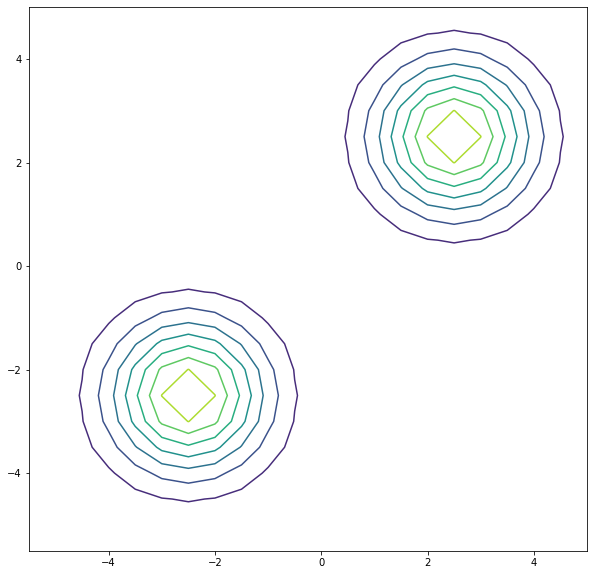

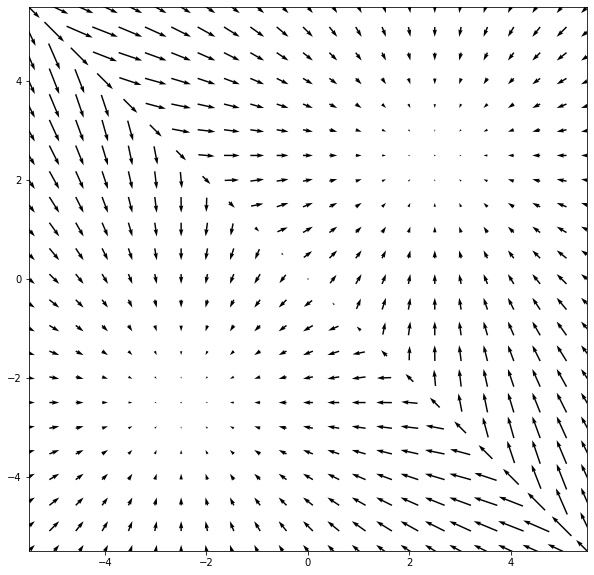

In [407]:
draw_scalar_field(two_normal, step=0.5, size=5.5)
draw_vector_field(log_xy, d_xftn, d_yftn, step=0.5, size=5.5)

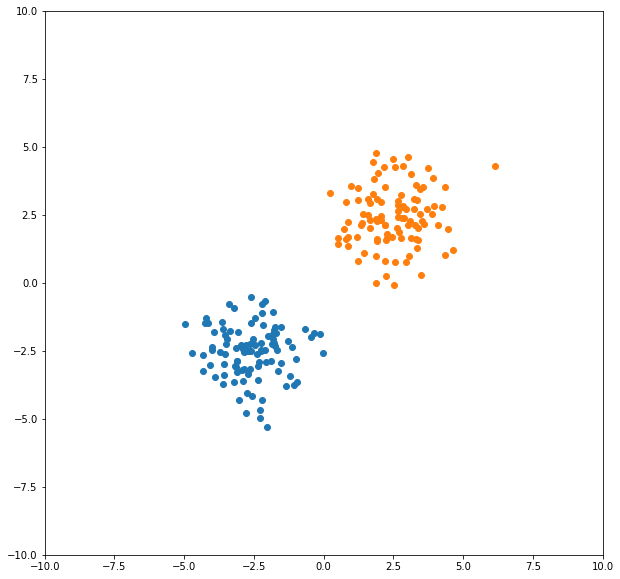

In [414]:
def draw_scatter(f, size, n, mu1, mu2, sigma1, sigma2):
    Z1 = f(size=int(n), mu=mu1, sigma=sigma1)
    X1 = [Z1[i][0] for i in range(len(Z1))]
    Y1 = [Z1[i][1] for i in range(len(Z1))]
    
    Z2 = f(size=int(n), mu=mu2, sigma=sigma2)
    X2 = [Z2[i][0] for i in range(len(Z2))]
    Y2 = [Z2[i][1] for i in range(len(Z2))]
    
    plt.figure(figsize=(10,10))
    plt.scatter(X1,Y1)
    plt.scatter(X2,Y2)
    plt.xlim(-1*size, size)
    plt.ylim(-1*size, size)
    plt.show()

mu1 , mu2 = [-2.5,-2.5], [2.5,2.5]
sigma1, sigma2 = [[1.0, 0.0],[0.0, 1.0]], [[1.0, 0.0],[0.0, 1.0]]
draw_scatter(discreate_random, size=10, n=100, mu1=mu1, mu2=mu2, sigma1=sigma1, sigma2=sigma2)